### Scraping the tweets from Twitter

Importing necessary libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import twint
from datetime import date, timedelta
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import datetime
import os 
import calendar 
import datetime
import random
import matplotlib.pyplot as plt
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import flair

Scraping the data from Twitter using TWINT tool

In [2]:
try:
    os.remove("./AsosTweets.csv")
except IOError:
    pass
    
today = datetime.date.today()

c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (today).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2021, 5, 3)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [11]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2021, 5, 2)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2020, 11, 2)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [14]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2020, 11, 1)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2020, 5, 1)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [ ]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2020, 4, 30)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2019, 10, 30)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

In [ ]:
tweets = pd.read_csv('AsosTweets.csv')
tweets.head()

Check if there are any duplicated rows.

In [3]:
tweets.duplicated().value_counts()

False    750839
dtype: int64

Adding a new column to count the number of words in each tweet, and filter the dataframe in order to get the tweets with 50 words or above.

In [4]:
tweets['length'] = tweets.tweet.apply(lambda x: len(str(x).split(' ')))
tweets=tweets[tweets['length']>=50]

In [5]:
tweets.shape

(22676, 37)

Sorting the dataframe by the date column from the most recent.

In [6]:
tweets.sort_values(by=['date'], inplace=True, ascending=False)

Filtering the dataframe to contain only necessary columns, which are date, tweet and place.

In [7]:
tweets=tweets[['date','tweet','place']]

Checking for and removing duplicates in the new dataframe.

In [8]:
tweets=tweets.drop_duplicates()
tweets.duplicated().value_counts()

False    22504
dtype: int64

Replacing null values in the column 'place' with 'Not specified'.

In [9]:
tweets['place'] = tweets['place'].fillna('Not specified')

In [10]:
tweets=tweets.reset_index(drop=True)
tweets.head()

,date,tweet,place
0,2021-11-03,@ASOS are seriously shit and going down hill. ...,Not specified
1,2021-11-03,@ASOS I have tried contacting through the app ...,Not specified
2,2021-11-03,hey! selling Harry inspired Grammy look!! neve...,Not specified
3,2021-11-02,@ASOS_news @ASOS @ASOSMarketplace I already ha...,Not specified
4,2021-11-02,@ASOS you need to sort your delivery service o...,Not specified


### Cleaning the tweets

Cleaning the tweets colums. Removing links, symbols, emojis, etc.

In [11]:
def clean_tweet(text):
    cleaned_text = []
    for tweet in text:
        cleaned_words = []
        for word in tweet.split(' '):
            word = re.sub('&amp;', '', word)
            word = re.sub('_', '', word)
            if(not word.startswith("http")):
                word=re.sub(r"-"," ",word)
                word=re.sub(r"/"," ",word)
            word=re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)","",word)
            word=word.lower()
            word = re.sub(r"\b(?:a*(?:ha+)+h?|(?:l+o+)+l+)\b", '', word)
            cleaned_words.append(word)
        cleaned_text.append(' '.join(cleaned_words))  
    return cleaned_text

In [12]:
tweets['cleaned_tweet']=clean_tweet(tweets['tweet'])

Correcting the misspelled words in tweets.

In [13]:
def spelling_check(tweets):
    x=1
    new_tweets=[]
    for tweet in tweets:
        print(str(x)+" - ", end="")
        x=x+1
        tweet=re.sub(r'(.)\1{2,}', r'\1', tweet)
        new_tweet=[]
        splitted_tweet = tweet.split()
        spell = SpellChecker()
        for word in splitted_tweet:
            new_tweet.append(spell.correction(word))
        new_tweets.append(' '.join(new_tweet))
    return new_tweets

In [14]:
tweets['cleaned_tweet']=spelling_check(tweets['cleaned_tweet'])

1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - 154 - 155 - 156 - 157 - 158 - 159 - 160 - 161 - 162 - 163 - 164 - 165 - 166 - 167 - 168 - 169 - 170 - 171 - 172 - 173 - 174 - 175 - 176 - 177 - 178 - 179 - 180 - 181 - 182 - 183 - 184 - 185 

1331 - 1332 - 1333 - 1334 - 1335 - 1336 - 1337 - 1338 - 1339 - 1340 - 1341 - 1342 - 1343 - 1344 - 1345 - 1346 - 1347 - 1348 - 1349 - 1350 - 1351 - 1352 - 1353 - 1354 - 1355 - 1356 - 1357 - 1358 - 1359 - 1360 - 1361 - 1362 - 1363 - 1364 - 1365 - 1366 - 1367 - 1368 - 1369 - 1370 - 1371 - 1372 - 1373 - 1374 - 1375 - 1376 - 1377 - 1378 - 1379 - 1380 - 1381 - 1382 - 1383 - 1384 - 1385 - 1386 - 1387 - 1388 - 1389 - 1390 - 1391 - 1392 - 1393 - 1394 - 1395 - 1396 - 1397 - 1398 - 1399 - 1400 - 1401 - 1402 - 1403 - 1404 - 1405 - 1406 - 1407 - 1408 - 1409 - 1410 - 1411 - 1412 - 1413 - 1414 - 1415 - 1416 - 1417 - 1418 - 1419 - 1420 - 1421 - 1422 - 1423 - 1424 - 1425 - 1426 - 1427 - 1428 - 1429 - 1430 - 1431 - 1432 - 1433 - 1434 - 1435 - 1436 - 1437 - 1438 - 1439 - 1440 - 1441 - 1442 - 1443 - 1444 - 1445 - 1446 - 1447 - 1448 - 1449 - 1450 - 1451 - 1452 - 1453 - 1454 - 1455 - 1456 - 1457 - 1458 - 1459 - 1460 - 1461 - 1462 - 1463 - 1464 - 1465 - 1466 - 1467 - 1468 - 1469 - 1470 - 1471 - 1472 - 1473 -

2502 - 2503 - 2504 - 2505 - 2506 - 2507 - 2508 - 2509 - 2510 - 2511 - 2512 - 2513 - 2514 - 2515 - 2516 - 2517 - 2518 - 2519 - 2520 - 2521 - 2522 - 2523 - 2524 - 2525 - 2526 - 2527 - 2528 - 2529 - 2530 - 2531 - 2532 - 2533 - 2534 - 2535 - 2536 - 2537 - 2538 - 2539 - 2540 - 2541 - 2542 - 2543 - 2544 - 2545 - 2546 - 2547 - 2548 - 2549 - 2550 - 2551 - 2552 - 2553 - 2554 - 2555 - 2556 - 2557 - 2558 - 2559 - 2560 - 2561 - 2562 - 2563 - 2564 - 2565 - 2566 - 2567 - 2568 - 2569 - 2570 - 2571 - 2572 - 2573 - 2574 - 2575 - 2576 - 2577 - 2578 - 2579 - 2580 - 2581 - 2582 - 2583 - 2584 - 2585 - 2586 - 2587 - 2588 - 2589 - 2590 - 2591 - 2592 - 2593 - 2594 - 2595 - 2596 - 2597 - 2598 - 2599 - 2600 - 2601 - 2602 - 2603 - 2604 - 2605 - 2606 - 2607 - 2608 - 2609 - 2610 - 2611 - 2612 - 2613 - 2614 - 2615 - 2616 - 2617 - 2618 - 2619 - 2620 - 2621 - 2622 - 2623 - 2624 - 2625 - 2626 - 2627 - 2628 - 2629 - 2630 - 2631 - 2632 - 2633 - 2634 - 2635 - 2636 - 2637 - 2638 - 2639 - 2640 - 2641 - 2642 - 2643 - 2644 -

3674 - 3675 - 3676 - 3677 - 3678 - 3679 - 3680 - 3681 - 3682 - 3683 - 3684 - 3685 - 3686 - 3687 - 3688 - 3689 - 3690 - 3691 - 3692 - 3693 - 3694 - 3695 - 3696 - 3697 - 3698 - 3699 - 3700 - 3701 - 3702 - 3703 - 3704 - 3705 - 3706 - 3707 - 3708 - 3709 - 3710 - 3711 - 3712 - 3713 - 3714 - 3715 - 3716 - 3717 - 3718 - 3719 - 3720 - 3721 - 3722 - 3723 - 3724 - 3725 - 3726 - 3727 - 3728 - 3729 - 3730 - 3731 - 3732 - 3733 - 3734 - 3735 - 3736 - 3737 - 3738 - 3739 - 3740 - 3741 - 3742 - 3743 - 3744 - 3745 - 3746 - 3747 - 3748 - 3749 - 3750 - 3751 - 3752 - 3753 - 3754 - 3755 - 3756 - 3757 - 3758 - 3759 - 3760 - 3761 - 3762 - 3763 - 3764 - 3765 - 3766 - 3767 - 3768 - 3769 - 3770 - 3771 - 3772 - 3773 - 3774 - 3775 - 3776 - 3777 - 3778 - 3779 - 3780 - 3781 - 3782 - 3783 - 3784 - 3785 - 3786 - 3787 - 3788 - 3789 - 3790 - 3791 - 3792 - 3793 - 3794 - 3795 - 3796 - 3797 - 3798 - 3799 - 3800 - 3801 - 3802 - 3803 - 3804 - 3805 - 3806 - 3807 - 3808 - 3809 - 3810 - 3811 - 3812 - 3813 - 3814 - 3815 - 3816 -

4845 - 4846 - 4847 - 4848 - 4849 - 4850 - 4851 - 4852 - 4853 - 4854 - 4855 - 4856 - 4857 - 4858 - 4859 - 4860 - 4861 - 4862 - 4863 - 4864 - 4865 - 4866 - 4867 - 4868 - 4869 - 4870 - 4871 - 4872 - 4873 - 4874 - 4875 - 4876 - 4877 - 4878 - 4879 - 4880 - 4881 - 4882 - 4883 - 4884 - 4885 - 4886 - 4887 - 4888 - 4889 - 4890 - 4891 - 4892 - 4893 - 4894 - 4895 - 4896 - 4897 - 4898 - 4899 - 4900 - 4901 - 4902 - 4903 - 4904 - 4905 - 4906 - 4907 - 4908 - 4909 - 4910 - 4911 - 4912 - 4913 - 4914 - 4915 - 4916 - 4917 - 4918 - 4919 - 4920 - 4921 - 4922 - 4923 - 4924 - 4925 - 4926 - 4927 - 4928 - 4929 - 4930 - 4931 - 4932 - 4933 - 4934 - 4935 - 4936 - 4937 - 4938 - 4939 - 4940 - 4941 - 4942 - 4943 - 4944 - 4945 - 4946 - 4947 - 4948 - 4949 - 4950 - 4951 - 4952 - 4953 - 4954 - 4955 - 4956 - 4957 - 4958 - 4959 - 4960 - 4961 - 4962 - 4963 - 4964 - 4965 - 4966 - 4967 - 4968 - 4969 - 4970 - 4971 - 4972 - 4973 - 4974 - 4975 - 4976 - 4977 - 4978 - 4979 - 4980 - 4981 - 4982 - 4983 - 4984 - 4985 - 4986 - 4987 -

6017 - 6018 - 6019 - 6020 - 6021 - 6022 - 6023 - 6024 - 6025 - 6026 - 6027 - 6028 - 6029 - 6030 - 6031 - 6032 - 6033 - 6034 - 6035 - 6036 - 6037 - 6038 - 6039 - 6040 - 6041 - 6042 - 6043 - 6044 - 6045 - 6046 - 6047 - 6048 - 6049 - 6050 - 6051 - 6052 - 6053 - 6054 - 6055 - 6056 - 6057 - 6058 - 6059 - 6060 - 6061 - 6062 - 6063 - 6064 - 6065 - 6066 - 6067 - 6068 - 6069 - 6070 - 6071 - 6072 - 6073 - 6074 - 6075 - 6076 - 6077 - 6078 - 6079 - 6080 - 6081 - 6082 - 6083 - 6084 - 6085 - 6086 - 6087 - 6088 - 6089 - 6090 - 6091 - 6092 - 6093 - 6094 - 6095 - 6096 - 6097 - 6098 - 6099 - 6100 - 6101 - 6102 - 6103 - 6104 - 6105 - 6106 - 6107 - 6108 - 6109 - 6110 - 6111 - 6112 - 6113 - 6114 - 6115 - 6116 - 6117 - 6118 - 6119 - 6120 - 6121 - 6122 - 6123 - 6124 - 6125 - 6126 - 6127 - 6128 - 6129 - 6130 - 6131 - 6132 - 6133 - 6134 - 6135 - 6136 - 6137 - 6138 - 6139 - 6140 - 6141 - 6142 - 6143 - 6144 - 6145 - 6146 - 6147 - 6148 - 6149 - 6150 - 6151 - 6152 - 6153 - 6154 - 6155 - 6156 - 6157 - 6158 - 6159 -

7188 - 7189 - 7190 - 7191 - 7192 - 7193 - 7194 - 7195 - 7196 - 7197 - 7198 - 7199 - 7200 - 7201 - 7202 - 7203 - 7204 - 7205 - 7206 - 7207 - 7208 - 7209 - 7210 - 7211 - 7212 - 7213 - 7214 - 7215 - 7216 - 7217 - 7218 - 7219 - 7220 - 7221 - 7222 - 7223 - 7224 - 7225 - 7226 - 7227 - 7228 - 7229 - 7230 - 7231 - 7232 - 7233 - 7234 - 7235 - 7236 - 7237 - 7238 - 7239 - 7240 - 7241 - 7242 - 7243 - 7244 - 7245 - 7246 - 7247 - 7248 - 7249 - 7250 - 7251 - 7252 - 7253 - 7254 - 7255 - 7256 - 7257 - 7258 - 7259 - 7260 - 7261 - 7262 - 7263 - 7264 - 7265 - 7266 - 7267 - 7268 - 7269 - 7270 - 7271 - 7272 - 7273 - 7274 - 7275 - 7276 - 7277 - 7278 - 7279 - 7280 - 7281 - 7282 - 7283 - 7284 - 7285 - 7286 - 7287 - 7288 - 7289 - 7290 - 7291 - 7292 - 7293 - 7294 - 7295 - 7296 - 7297 - 7298 - 7299 - 7300 - 7301 - 7302 - 7303 - 7304 - 7305 - 7306 - 7307 - 7308 - 7309 - 7310 - 7311 - 7312 - 7313 - 7314 - 7315 - 7316 - 7317 - 7318 - 7319 - 7320 - 7321 - 7322 - 7323 - 7324 - 7325 - 7326 - 7327 - 7328 - 7329 - 7330 -

8361 - 8362 - 8363 - 8364 - 8365 - 8366 - 8367 - 8368 - 8369 - 8370 - 8371 - 8372 - 8373 - 8374 - 8375 - 8376 - 8377 - 8378 - 8379 - 8380 - 8381 - 8382 - 8383 - 8384 - 8385 - 8386 - 8387 - 8388 - 8389 - 8390 - 8391 - 8392 - 8393 - 8394 - 8395 - 8396 - 8397 - 8398 - 8399 - 8400 - 8401 - 8402 - 8403 - 8404 - 8405 - 8406 - 8407 - 8408 - 8409 - 8410 - 8411 - 8412 - 8413 - 8414 - 8415 - 8416 - 8417 - 8418 - 8419 - 8420 - 8421 - 8422 - 8423 - 8424 - 8425 - 8426 - 8427 - 8428 - 8429 - 8430 - 8431 - 8432 - 8433 - 8434 - 8435 - 8436 - 8437 - 8438 - 8439 - 8440 - 8441 - 8442 - 8443 - 8444 - 8445 - 8446 - 8447 - 8448 - 8449 - 8450 - 8451 - 8452 - 8453 - 8454 - 8455 - 8456 - 8457 - 8458 - 8459 - 8460 - 8461 - 8462 - 8463 - 8464 - 8465 - 8466 - 8467 - 8468 - 8469 - 8470 - 8471 - 8472 - 8473 - 8474 - 8475 - 8476 - 8477 - 8478 - 8479 - 8480 - 8481 - 8482 - 8483 - 8484 - 8485 - 8486 - 8487 - 8488 - 8489 - 8490 - 8491 - 8492 - 8493 - 8494 - 8495 - 8496 - 8497 - 8498 - 8499 - 8500 - 8501 - 8502 - 8503 -

9532 - 9533 - 9534 - 9535 - 9536 - 9537 - 9538 - 9539 - 9540 - 9541 - 9542 - 9543 - 9544 - 9545 - 9546 - 9547 - 9548 - 9549 - 9550 - 9551 - 9552 - 9553 - 9554 - 9555 - 9556 - 9557 - 9558 - 9559 - 9560 - 9561 - 9562 - 9563 - 9564 - 9565 - 9566 - 9567 - 9568 - 9569 - 9570 - 9571 - 9572 - 9573 - 9574 - 9575 - 9576 - 9577 - 9578 - 9579 - 9580 - 9581 - 9582 - 9583 - 9584 - 9585 - 9586 - 9587 - 9588 - 9589 - 9590 - 9591 - 9592 - 9593 - 9594 - 9595 - 9596 - 9597 - 9598 - 9599 - 9600 - 9601 - 9602 - 9603 - 9604 - 9605 - 9606 - 9607 - 9608 - 9609 - 9610 - 9611 - 9612 - 9613 - 9614 - 9615 - 9616 - 9617 - 9618 - 9619 - 9620 - 9621 - 9622 - 9623 - 9624 - 9625 - 9626 - 9627 - 9628 - 9629 - 9630 - 9631 - 9632 - 9633 - 9634 - 9635 - 9636 - 9637 - 9638 - 9639 - 9640 - 9641 - 9642 - 9643 - 9644 - 9645 - 9646 - 9647 - 9648 - 9649 - 9650 - 9651 - 9652 - 9653 - 9654 - 9655 - 9656 - 9657 - 9658 - 9659 - 9660 - 9661 - 9662 - 9663 - 9664 - 9665 - 9666 - 9667 - 9668 - 9669 - 9670 - 9671 - 9672 - 9673 - 9674 -

10617 - 10618 - 10619 - 10620 - 10621 - 10622 - 10623 - 10624 - 10625 - 10626 - 10627 - 10628 - 10629 - 10630 - 10631 - 10632 - 10633 - 10634 - 10635 - 10636 - 10637 - 10638 - 10639 - 10640 - 10641 - 10642 - 10643 - 10644 - 10645 - 10646 - 10647 - 10648 - 10649 - 10650 - 10651 - 10652 - 10653 - 10654 - 10655 - 10656 - 10657 - 10658 - 10659 - 10660 - 10661 - 10662 - 10663 - 10664 - 10665 - 10666 - 10667 - 10668 - 10669 - 10670 - 10671 - 10672 - 10673 - 10674 - 10675 - 10676 - 10677 - 10678 - 10679 - 10680 - 10681 - 10682 - 10683 - 10684 - 10685 - 10686 - 10687 - 10688 - 10689 - 10690 - 10691 - 10692 - 10693 - 10694 - 10695 - 10696 - 10697 - 10698 - 10699 - 10700 - 10701 - 10702 - 10703 - 10704 - 10705 - 10706 - 10707 - 10708 - 10709 - 10710 - 10711 - 10712 - 10713 - 10714 - 10715 - 10716 - 10717 - 10718 - 10719 - 10720 - 10721 - 10722 - 10723 - 10724 - 10725 - 10726 - 10727 - 10728 - 10729 - 10730 - 10731 - 10732 - 10733 - 10734 - 10735 - 10736 - 10737 - 10738 - 10739 - 10740 - 10741 - 

11642 - 11643 - 11644 - 11645 - 11646 - 11647 - 11648 - 11649 - 11650 - 11651 - 11652 - 11653 - 11654 - 11655 - 11656 - 11657 - 11658 - 11659 - 11660 - 11661 - 11662 - 11663 - 11664 - 11665 - 11666 - 11667 - 11668 - 11669 - 11670 - 11671 - 11672 - 11673 - 11674 - 11675 - 11676 - 11677 - 11678 - 11679 - 11680 - 11681 - 11682 - 11683 - 11684 - 11685 - 11686 - 11687 - 11688 - 11689 - 11690 - 11691 - 11692 - 11693 - 11694 - 11695 - 11696 - 11697 - 11698 - 11699 - 11700 - 11701 - 11702 - 11703 - 11704 - 11705 - 11706 - 11707 - 11708 - 11709 - 11710 - 11711 - 11712 - 11713 - 11714 - 11715 - 11716 - 11717 - 11718 - 11719 - 11720 - 11721 - 11722 - 11723 - 11724 - 11725 - 11726 - 11727 - 11728 - 11729 - 11730 - 11731 - 11732 - 11733 - 11734 - 11735 - 11736 - 11737 - 11738 - 11739 - 11740 - 11741 - 11742 - 11743 - 11744 - 11745 - 11746 - 11747 - 11748 - 11749 - 11750 - 11751 - 11752 - 11753 - 11754 - 11755 - 11756 - 11757 - 11758 - 11759 - 11760 - 11761 - 11762 - 11763 - 11764 - 11765 - 11766 - 

12669 - 12670 - 12671 - 12672 - 12673 - 12674 - 12675 - 12676 - 12677 - 12678 - 12679 - 12680 - 12681 - 12682 - 12683 - 12684 - 12685 - 12686 - 12687 - 12688 - 12689 - 12690 - 12691 - 12692 - 12693 - 12694 - 12695 - 12696 - 12697 - 12698 - 12699 - 12700 - 12701 - 12702 - 12703 - 12704 - 12705 - 12706 - 12707 - 12708 - 12709 - 12710 - 12711 - 12712 - 12713 - 12714 - 12715 - 12716 - 12717 - 12718 - 12719 - 12720 - 12721 - 12722 - 12723 - 12724 - 12725 - 12726 - 12727 - 12728 - 12729 - 12730 - 12731 - 12732 - 12733 - 12734 - 12735 - 12736 - 12737 - 12738 - 12739 - 12740 - 12741 - 12742 - 12743 - 12744 - 12745 - 12746 - 12747 - 12748 - 12749 - 12750 - 12751 - 12752 - 12753 - 12754 - 12755 - 12756 - 12757 - 12758 - 12759 - 12760 - 12761 - 12762 - 12763 - 12764 - 12765 - 12766 - 12767 - 12768 - 12769 - 12770 - 12771 - 12772 - 12773 - 12774 - 12775 - 12776 - 12777 - 12778 - 12779 - 12780 - 12781 - 12782 - 12783 - 12784 - 12785 - 12786 - 12787 - 12788 - 12789 - 12790 - 12791 - 12792 - 12793 - 

13695 - 13696 - 13697 - 13698 - 13699 - 13700 - 13701 - 13702 - 13703 - 13704 - 13705 - 13706 - 13707 - 13708 - 13709 - 13710 - 13711 - 13712 - 13713 - 13714 - 13715 - 13716 - 13717 - 13718 - 13719 - 13720 - 13721 - 13722 - 13723 - 13724 - 13725 - 13726 - 13727 - 13728 - 13729 - 13730 - 13731 - 13732 - 13733 - 13734 - 13735 - 13736 - 13737 - 13738 - 13739 - 13740 - 13741 - 13742 - 13743 - 13744 - 13745 - 13746 - 13747 - 13748 - 13749 - 13750 - 13751 - 13752 - 13753 - 13754 - 13755 - 13756 - 13757 - 13758 - 13759 - 13760 - 13761 - 13762 - 13763 - 13764 - 13765 - 13766 - 13767 - 13768 - 13769 - 13770 - 13771 - 13772 - 13773 - 13774 - 13775 - 13776 - 13777 - 13778 - 13779 - 13780 - 13781 - 13782 - 13783 - 13784 - 13785 - 13786 - 13787 - 13788 - 13789 - 13790 - 13791 - 13792 - 13793 - 13794 - 13795 - 13796 - 13797 - 13798 - 13799 - 13800 - 13801 - 13802 - 13803 - 13804 - 13805 - 13806 - 13807 - 13808 - 13809 - 13810 - 13811 - 13812 - 13813 - 13814 - 13815 - 13816 - 13817 - 13818 - 13819 - 

14721 - 14722 - 14723 - 14724 - 14725 - 14726 - 14727 - 14728 - 14729 - 14730 - 14731 - 14732 - 14733 - 14734 - 14735 - 14736 - 14737 - 14738 - 14739 - 14740 - 14741 - 14742 - 14743 - 14744 - 14745 - 14746 - 14747 - 14748 - 14749 - 14750 - 14751 - 14752 - 14753 - 14754 - 14755 - 14756 - 14757 - 14758 - 14759 - 14760 - 14761 - 14762 - 14763 - 14764 - 14765 - 14766 - 14767 - 14768 - 14769 - 14770 - 14771 - 14772 - 14773 - 14774 - 14775 - 14776 - 14777 - 14778 - 14779 - 14780 - 14781 - 14782 - 14783 - 14784 - 14785 - 14786 - 14787 - 14788 - 14789 - 14790 - 14791 - 14792 - 14793 - 14794 - 14795 - 14796 - 14797 - 14798 - 14799 - 14800 - 14801 - 14802 - 14803 - 14804 - 14805 - 14806 - 14807 - 14808 - 14809 - 14810 - 14811 - 14812 - 14813 - 14814 - 14815 - 14816 - 14817 - 14818 - 14819 - 14820 - 14821 - 14822 - 14823 - 14824 - 14825 - 14826 - 14827 - 14828 - 14829 - 14830 - 14831 - 14832 - 14833 - 14834 - 14835 - 14836 - 14837 - 14838 - 14839 - 14840 - 14841 - 14842 - 14843 - 14844 - 14845 - 

15746 - 15747 - 15748 - 15749 - 15750 - 15751 - 15752 - 15753 - 15754 - 15755 - 15756 - 15757 - 15758 - 15759 - 15760 - 15761 - 15762 - 15763 - 15764 - 15765 - 15766 - 15767 - 15768 - 15769 - 15770 - 15771 - 15772 - 15773 - 15774 - 15775 - 15776 - 15777 - 15778 - 15779 - 15780 - 15781 - 15782 - 15783 - 15784 - 15785 - 15786 - 15787 - 15788 - 15789 - 15790 - 15791 - 15792 - 15793 - 15794 - 15795 - 15796 - 15797 - 15798 - 15799 - 15800 - 15801 - 15802 - 15803 - 15804 - 15805 - 15806 - 15807 - 15808 - 15809 - 15810 - 15811 - 15812 - 15813 - 15814 - 15815 - 15816 - 15817 - 15818 - 15819 - 15820 - 15821 - 15822 - 15823 - 15824 - 15825 - 15826 - 15827 - 15828 - 15829 - 15830 - 15831 - 15832 - 15833 - 15834 - 15835 - 15836 - 15837 - 15838 - 15839 - 15840 - 15841 - 15842 - 15843 - 15844 - 15845 - 15846 - 15847 - 15848 - 15849 - 15850 - 15851 - 15852 - 15853 - 15854 - 15855 - 15856 - 15857 - 15858 - 15859 - 15860 - 15861 - 15862 - 15863 - 15864 - 15865 - 15866 - 15867 - 15868 - 15869 - 15870 - 

16773 - 16774 - 16775 - 16776 - 16777 - 16778 - 16779 - 16780 - 16781 - 16782 - 16783 - 16784 - 16785 - 16786 - 16787 - 16788 - 16789 - 16790 - 16791 - 16792 - 16793 - 16794 - 16795 - 16796 - 16797 - 16798 - 16799 - 16800 - 16801 - 16802 - 16803 - 16804 - 16805 - 16806 - 16807 - 16808 - 16809 - 16810 - 16811 - 16812 - 16813 - 16814 - 16815 - 16816 - 16817 - 16818 - 16819 - 16820 - 16821 - 16822 - 16823 - 16824 - 16825 - 16826 - 16827 - 16828 - 16829 - 16830 - 16831 - 16832 - 16833 - 16834 - 16835 - 16836 - 16837 - 16838 - 16839 - 16840 - 16841 - 16842 - 16843 - 16844 - 16845 - 16846 - 16847 - 16848 - 16849 - 16850 - 16851 - 16852 - 16853 - 16854 - 16855 - 16856 - 16857 - 16858 - 16859 - 16860 - 16861 - 16862 - 16863 - 16864 - 16865 - 16866 - 16867 - 16868 - 16869 - 16870 - 16871 - 16872 - 16873 - 16874 - 16875 - 16876 - 16877 - 16878 - 16879 - 16880 - 16881 - 16882 - 16883 - 16884 - 16885 - 16886 - 16887 - 16888 - 16889 - 16890 - 16891 - 16892 - 16893 - 16894 - 16895 - 16896 - 16897 - 

17799 - 17800 - 17801 - 17802 - 17803 - 17804 - 17805 - 17806 - 17807 - 17808 - 17809 - 17810 - 17811 - 17812 - 17813 - 17814 - 17815 - 17816 - 17817 - 17818 - 17819 - 17820 - 17821 - 17822 - 17823 - 17824 - 17825 - 17826 - 17827 - 17828 - 17829 - 17830 - 17831 - 17832 - 17833 - 17834 - 17835 - 17836 - 17837 - 17838 - 17839 - 17840 - 17841 - 17842 - 17843 - 17844 - 17845 - 17846 - 17847 - 17848 - 17849 - 17850 - 17851 - 17852 - 17853 - 17854 - 17855 - 17856 - 17857 - 17858 - 17859 - 17860 - 17861 - 17862 - 17863 - 17864 - 17865 - 17866 - 17867 - 17868 - 17869 - 17870 - 17871 - 17872 - 17873 - 17874 - 17875 - 17876 - 17877 - 17878 - 17879 - 17880 - 17881 - 17882 - 17883 - 17884 - 17885 - 17886 - 17887 - 17888 - 17889 - 17890 - 17891 - 17892 - 17893 - 17894 - 17895 - 17896 - 17897 - 17898 - 17899 - 17900 - 17901 - 17902 - 17903 - 17904 - 17905 - 17906 - 17907 - 17908 - 17909 - 17910 - 17911 - 17912 - 17913 - 17914 - 17915 - 17916 - 17917 - 17918 - 17919 - 17920 - 17921 - 17922 - 17923 - 

18825 - 18826 - 18827 - 18828 - 18829 - 18830 - 18831 - 18832 - 18833 - 18834 - 18835 - 18836 - 18837 - 18838 - 18839 - 18840 - 18841 - 18842 - 18843 - 18844 - 18845 - 18846 - 18847 - 18848 - 18849 - 18850 - 18851 - 18852 - 18853 - 18854 - 18855 - 18856 - 18857 - 18858 - 18859 - 18860 - 18861 - 18862 - 18863 - 18864 - 18865 - 18866 - 18867 - 18868 - 18869 - 18870 - 18871 - 18872 - 18873 - 18874 - 18875 - 18876 - 18877 - 18878 - 18879 - 18880 - 18881 - 18882 - 18883 - 18884 - 18885 - 18886 - 18887 - 18888 - 18889 - 18890 - 18891 - 18892 - 18893 - 18894 - 18895 - 18896 - 18897 - 18898 - 18899 - 18900 - 18901 - 18902 - 18903 - 18904 - 18905 - 18906 - 18907 - 18908 - 18909 - 18910 - 18911 - 18912 - 18913 - 18914 - 18915 - 18916 - 18917 - 18918 - 18919 - 18920 - 18921 - 18922 - 18923 - 18924 - 18925 - 18926 - 18927 - 18928 - 18929 - 18930 - 18931 - 18932 - 18933 - 18934 - 18935 - 18936 - 18937 - 18938 - 18939 - 18940 - 18941 - 18942 - 18943 - 18944 - 18945 - 18946 - 18947 - 18948 - 18949 - 

19851 - 19852 - 19853 - 19854 - 19855 - 19856 - 19857 - 19858 - 19859 - 19860 - 19861 - 19862 - 19863 - 19864 - 19865 - 19866 - 19867 - 19868 - 19869 - 19870 - 19871 - 19872 - 19873 - 19874 - 19875 - 19876 - 19877 - 19878 - 19879 - 19880 - 19881 - 19882 - 19883 - 19884 - 19885 - 19886 - 19887 - 19888 - 19889 - 19890 - 19891 - 19892 - 19893 - 19894 - 19895 - 19896 - 19897 - 19898 - 19899 - 19900 - 19901 - 19902 - 19903 - 19904 - 19905 - 19906 - 19907 - 19908 - 19909 - 19910 - 19911 - 19912 - 19913 - 19914 - 19915 - 19916 - 19917 - 19918 - 19919 - 19920 - 19921 - 19922 - 19923 - 19924 - 19925 - 19926 - 19927 - 19928 - 19929 - 19930 - 19931 - 19932 - 19933 - 19934 - 19935 - 19936 - 19937 - 19938 - 19939 - 19940 - 19941 - 19942 - 19943 - 19944 - 19945 - 19946 - 19947 - 19948 - 19949 - 19950 - 19951 - 19952 - 19953 - 19954 - 19955 - 19956 - 19957 - 19958 - 19959 - 19960 - 19961 - 19962 - 19963 - 19964 - 19965 - 19966 - 19967 - 19968 - 19969 - 19970 - 19971 - 19972 - 19973 - 19974 - 19975 - 

20877 - 20878 - 20879 - 20880 - 20881 - 20882 - 20883 - 20884 - 20885 - 20886 - 20887 - 20888 - 20889 - 20890 - 20891 - 20892 - 20893 - 20894 - 20895 - 20896 - 20897 - 20898 - 20899 - 20900 - 20901 - 20902 - 20903 - 20904 - 20905 - 20906 - 20907 - 20908 - 20909 - 20910 - 20911 - 20912 - 20913 - 20914 - 20915 - 20916 - 20917 - 20918 - 20919 - 20920 - 20921 - 20922 - 20923 - 20924 - 20925 - 20926 - 20927 - 20928 - 20929 - 20930 - 20931 - 20932 - 20933 - 20934 - 20935 - 20936 - 20937 - 20938 - 20939 - 20940 - 20941 - 20942 - 20943 - 20944 - 20945 - 20946 - 20947 - 20948 - 20949 - 20950 - 20951 - 20952 - 20953 - 20954 - 20955 - 20956 - 20957 - 20958 - 20959 - 20960 - 20961 - 20962 - 20963 - 20964 - 20965 - 20966 - 20967 - 20968 - 20969 - 20970 - 20971 - 20972 - 20973 - 20974 - 20975 - 20976 - 20977 - 20978 - 20979 - 20980 - 20981 - 20982 - 20983 - 20984 - 20985 - 20986 - 20987 - 20988 - 20989 - 20990 - 20991 - 20992 - 20993 - 20994 - 20995 - 20996 - 20997 - 20998 - 20999 - 21000 - 21001 - 

21902 - 21903 - 21904 - 21905 - 21906 - 21907 - 21908 - 21909 - 21910 - 21911 - 21912 - 21913 - 21914 - 21915 - 21916 - 21917 - 21918 - 21919 - 21920 - 21921 - 21922 - 21923 - 21924 - 21925 - 21926 - 21927 - 21928 - 21929 - 21930 - 21931 - 21932 - 21933 - 21934 - 21935 - 21936 - 21937 - 21938 - 21939 - 21940 - 21941 - 21942 - 21943 - 21944 - 21945 - 21946 - 21947 - 21948 - 21949 - 21950 - 21951 - 21952 - 21953 - 21954 - 21955 - 21956 - 21957 - 21958 - 21959 - 21960 - 21961 - 21962 - 21963 - 21964 - 21965 - 21966 - 21967 - 21968 - 21969 - 21970 - 21971 - 21972 - 21973 - 21974 - 21975 - 21976 - 21977 - 21978 - 21979 - 21980 - 21981 - 21982 - 21983 - 21984 - 21985 - 21986 - 21987 - 21988 - 21989 - 21990 - 21991 - 21992 - 21993 - 21994 - 21995 - 21996 - 21997 - 21998 - 21999 - 22000 - 22001 - 22002 - 22003 - 22004 - 22005 - 22006 - 22007 - 22008 - 22009 - 22010 - 22011 - 22012 - 22013 - 22014 - 22015 - 22016 - 22017 - 22018 - 22019 - 22020 - 22021 - 22022 - 22023 - 22024 - 22025 - 22026 - 

Applying lemmatizer to the tweets.

In [15]:
def lemmatize_words(tweets, lemmatizer):
    cleaned_text=[]
    for tweet in tweets:
        cleaned_words=[]
        for word in tweet.split(' '):
            lem_word = lemmatizer.lemmatize(word)
            lem_word = re.sub(r"\b[a-zA-Z]\b", '', lem_word)
            cleaned_words.append(lem_word)
        cleaned_text.append(' '.join(cleaned_words))
    cleaned_text2 = []
    for post in cleaned_text:
        pattern = re.compile(r'\s+') 
        cleaned_text3 = re.sub(pattern, ' ', post).strip()
        cleaned_text2.append(''.join(cleaned_text3)) 
    return cleaned_text2

In [16]:
wordnet_lemmatizer = WordNetLemmatizer()
tweets['cleaned_tweet']=lemmatize_words(tweets['cleaned_tweet'],lemmatizer=wordnet_lemmatizer)

Data after cleaning

In [17]:
tweets.head()

,date,tweet,place,cleaned_tweet
0,2021-11-03,@ASOS are seriously shit and going down hill. ...,Not specified,are seriously shit and going down hill theyve ...
1,2021-11-03,@ASOS I have tried contacting through the app ...,Not specified,have tried contacting through the app but no l...
2,2021-11-03,hey! selling Harry inspired Grammy look!! neve...,Not specified,hey selling harry inspired grammy look never w...
3,2021-11-02,@ASOS_news @ASOS @ASOSMarketplace I already ha...,Not specified,already have done incorrect item sent they sai...
4,2021-11-02,@ASOS you need to sort your delivery service o...,Not specified,you need to sort your delivery service out shi...


Saving the cleaned dataframe in a csv file.

In [18]:
tweets.to_csv('AsosTweets_cleaned.csv', index=False)

# Topic Modeling

In [2]:
tweets = pd.read_csv('AsosTweets_cleaned.csv')

### Vectorize

In [3]:
stop_words = text.ENGLISH_STOP_WORDS.union(['thats','youll','theyve','im','versus','got','woulve','took','just','year','said','saying','guys','guy',
                                            'id','bs','bc','ill','theyll','youve','isnt','thought','theyre','vry',
                                            'dont','ive','anymore','cuz','asos','order','yeah','yea','yesterday', 'did', 'didnt','havent', 'week', 'hi','wa','ha','day','today','really'])

In [4]:
coun_vect = CountVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
count_matrix = coun_vect.fit_transform(tweets['cleaned_tweet'])
count_array = count_matrix.toarray()
tweets_vec = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
tweets_vec

,ab,ab problem,ababa,abandon,abandon india,abandoned,abandoning,abba,abba joke,abc,...,zip broke,zip broken,zip nylon,zipper,zizi,zoe,zone,zoom,zoom fresh,zoom meeting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tweets_vec.sum(0).sort_values(ascending=False)[:20]

item         3980
return       3584
time         3526
like         3522
delivery     3461
parcel       2888
refund       2858
help         2591
need         2498
sent         2496
email        2465
ordered      2396
want         2248
size         2081
received     2022
know         2014
say          1901
customer     1893
delivered    1748
money        1732
dtype: int64

In [6]:
tfidf_vect = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
tfidf_matrix = tfidf_vect.fit_transform(tweets['cleaned_tweet'])
tfidf_array = tfidf_matrix.toarray()
tweets_tfidf = pd.DataFrame(data=tfidf_array,columns = tfidf_vect.get_feature_names())
tweets_tfidf

,ab,ab problem,ababa,abandon,abandon india,abandoned,abandoning,abba,abba joke,abc,...,zip broke,zip broken,zip nylon,zipper,zizi,zoe,zone,zoom,zoom fresh,zoom meeting
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Modeling***

In [7]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

**LSA model for tf-idf**

In [8]:
lsa_model_2 = TruncatedSVD(2)
lsa_cv_doc_topic = lsa_model_2.fit_transform(tfidf_matrix)
lsa_model_2.explained_variance_ratio_

array([0.00175196, 0.00373266])

In [9]:
display_topics(lsa_model_2, tfidf_vect.get_feature_names(), 20) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service, delivered, want, say, size, money

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make, deserve, brand, good, think, shop


The model did not perform well. Trying the model with 3 topics

In [10]:
lsa_model_3 = TruncatedSVD(3)
lsa_cv_doc_topic = lsa_model_3.fit_transform(tfidf_matrix)
lsa_model_3.explained_variance_ratio_

array([0.00175195, 0.00373298, 0.00353111])

In [11]:
display_topics(lsa_model_3, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, return item, code, refund, sent, returned, return label, bag, send, post office, post, office


In [12]:
lsa_model_4 = TruncatedSVD(4)
lsa_cv_doc_topic = lsa_model_4.fit_transform(tfidf_matrix)
lsa_model_4.explained_variance_ratio_

array([0.00175195, 0.00373317, 0.003533  , 0.00291425])

In [13]:
display_topics(lsa_model_4, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, work help, hey, help share, subscribe thanks, notice reach, hope subscribe


In [14]:
lsa_model_5 = TruncatedSVD(5)
lsa_cv_doc_topic = lsa_model_5.fit_transform(tfidf_matrix)
lsa_model_5.explained_variance_ratio_

array([0.00175195, 0.00373242, 0.00353127, 0.00292019, 0.00280999])

In [15]:
display_topics(lsa_model_5, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, fit, gift voucher, make, dress

Topic  2
return, item, label, code, size, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, hey, small youtube, video link, work help, help share, subscribe thanks, youtube hope, hope subscribe

Topic  4
gift, voucher, gift voucher, refund, customer, deserve, deserve gift, service, email, customer service, money, chat, bank, treat, asostreatme


In [16]:
lsa_model_6 = TruncatedSVD(6)
lsa_cv_doc_topic = lsa_model_6.fit_transform(tfidf_matrix)
lsa_model_6.explained_variance_ratio_

array([0.00175196, 0.00373324, 0.00353147, 0.00292034, 0.00281114,
       0.00278311])

In [17]:
display_topics(lsa_model_6, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, dress, work, fit, gift voucher, make

Topic  2
return, item, label, size, return item, code, sent, refund, returned, return label, bag, send, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, small youtube, video link, work, work help, notice reach, youtube hope, hope subscribe, subscribe thanks, help share

Topic  4
gift, voucher, gift voucher, customer, refund, deserve, service, deserve gift, customer service, money, email, chat, bank, treat, asostreatme

Topic  5
return, parcel, code, label, voucher, delivered, hermes, gift, delivery, gift voucher, need, post, new, deserve, return label


In [18]:
lsa_model_7 = TruncatedSVD(7)
lsa_cv_doc_topic = lsa_model_7.fit_transform(tfidf_matrix)
lsa_model_7.explained_variance_ratio_

array([0.00175195, 0.00373297, 0.00353297, 0.00291778, 0.0028105 ,
       0.00279303, 0.00243885])

In [19]:
display_topics(lsa_model_7, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, dress, work, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, hey, small youtube, video link, work help, help share, notice reach, youtube hope, hope subscribe

Topic  4
gift, voucher, customer, refund, gift voucher, deserve, service, customer service, deserve gift, email, money, chat, bank, treat, month

Topic  5
return, parcel, voucher, code, label, gift, gift voucher, need, hermes, deserve, delivered, delivery, post, new, deserve gift

Topic  6
item, gift, voucher, ordered, gift voucher, deserve, deserve gift, delivery, received, size, sent, transferred, voucher transferred, refund, transferred bank


In [20]:
lsa_model_8 = TruncatedSVD(8)
lsa_cv_doc_topic = lsa_model_8.fit_transform(tfidf_matrix)
lsa_model_8.explained_variance_ratio_

array([0.00175196, 0.00373277, 0.00353321, 0.00291757, 0.00281209,
       0.00279437, 0.00244804, 0.00224623])

In [21]:
display_topics(lsa_model_8, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, youtube, help, thanks, subscribe, link, work, hey, small youtube, video link, work help, youtube hope, hope subscribe, subscribe thanks, notice reach

Topic  4
gift, voucher, customer, gift voucher, refund, deserve, service, customer service, deserve gift, email, money, chat, bank, treat, month

Topic  5
return, parcel, label, code, voucher, delivery, gift, hermes, gift voucher, delivered, need, new, deserve, post, office

Topic  6
item, gift, voucher, gift voucher, ordered, deserve, deserve gift, received, delivery, refund, sent, returned, delivered, asostreatme, transferred

Topic  7
delivery, item, paid, 

**LDA model for tf-idf**

In [22]:
lda_2 = LatentDirichletAllocation(2)
lda_doc_topic = lda_2.fit_transform(tfidf_matrix)

In [23]:
display_topics(lda_2, tfidf_vect.get_feature_names(), 15)


Topic  0
item, return, refund, sent, email, received, customer, service, time, help, told, ordered, money, returned, send

Topic  1
delivery, like, size, parcel, time, know, look, delivered, work, clothes, love, need, new, dress, going


In [24]:
lda_3 = LatentDirichletAllocation(3)
lda_doc_topic = lda_3.fit_transform(tfidf_matrix)

In [25]:
display_topics(lda_3, tfidf_vect.get_feature_names(), 15)


Topic  0
return, refund, item, email, sent, account, returned, received, help, chat, customer, money, code, service, time

Topic  1
delivery, parcel, delivered, ordered, hermes, item, package, email, time, say, sent, received, address, service, help

Topic  2
like, size, people, buy, new, clothes, dress, time, love, work, look, know, think, make, good


In [26]:
lda_4 = LatentDirichletAllocation(4)
lda_doc_topic = lda_4.fit_transform(tfidf_matrix)

In [27]:
display_topics(lda_4, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, refund, item, email, sent, ordered, delivered, received, service, customer, time, help, hermes, told

Topic  1
like, work, people, time, clothes, new, buy, love, need, make, voucher, look, dress, know, think

Topic  2
size, like, shoe, jean, pair, brand, black, look, sale, want, fit, good, plus, thing, think

Topic  3
return, item, code, label, bag, help, post, office, returned, refund, post office, need, parcel, return item, send


In [28]:
lda_5 = LatentDirichletAllocation(5)
lda_doc_topic = lda_5.fit_transform(tfidf_matrix)

In [29]:
display_topics(lda_5, tfidf_vect.get_feature_names(), 15)


Topic  0
parcel, delivery, return, item, delivered, ordered, hermes, say, code, help, sent, time, email, deliver, need

Topic  1
voucher, gift, gift voucher, deserve, work, treat, love, deserve gift, new, make, win, video, mum, asostreatme, need

Topic  2
customer, refund, delivery, money, email, service, account, time, item, customer service, return, want, paid, wait, help

Topic  3
refund, sent, received, item, email, ordered, help, time, return, returned, customer, service, parcel, told, chat

Topic  4
like, size, people, look, clothes, think, buy, brand, good, thing, fit, dress, know, shop, make


In [30]:
lda_6 = LatentDirichletAllocation(6)
lda_doc_topic = lda_6.fit_transform(tfidf_matrix)

In [31]:
display_topics(lda_6, tfidf_vect.get_feature_names(), 15)


Topic  0
like, people, door, time, need, parcel, delivery, address, left, home, help, work, company, way, jon

Topic  1
size, item, ordered, delivery, dress, like, time, want, return, sent, stock, wrong, know, need, pair

Topic  2
parcel, delivered, refund, help, email, contact, address, account, know, customer, time, ordered, like, told, delivery

Topic  3
amazon, work, video, fandom, like, make, help, win, code, want, share, card, shop, time, link

Topic  4
like, size, new, buy, clothes, love, look, voucher, time, people, work, good, return, think, need

Topic  5
return, parcel, delivery, email, item, refund, received, sent, time, help, say, hermes, delivered, returned, service


**Corex for tf-idf**

In [32]:
from corextopic import corextopic as ct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    return topics
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

In [34]:
#count vectorizer
words = list(np.asarray(coun_vect.get_feature_names()))
topic_model = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(count_matrix, words=words, docs=tweets['cleaned_tweet'])

#tf idf
words = list(np.asarray(tfidf_vect.get_feature_names()))
topic_model_2 = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)
topic_model_2.fit(tfidf_matrix, words=words, docs=tweets['cleaned_tweet'])

In [35]:
#topic modeling with count vectorizer
topics = corex_topics(topic_model)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
delivery, refund, parcel, email, delivered, received, service, customer service, customer, hermes,  
 
topic  1 :
item, ordered, return, sent, returned, people, wrong, code, arrived, job,  
 
topic  2 :
label, post office, fandom, office, return label, subscribe, youtube, fansub, print, post,  
 
topic  3 :
size, pair, fit, dress, wear, buy, bought, clothes, jean, shoe,  
 
topic  4 :
gift, voucher, gift voucher, deserve, deserve gift, treat, gift card, asostreatme, win, mum,  
 


In [36]:
#topic modeling with TF-IDF vectorizer
topics = corex_topics(topic_model_2)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
refund, parcel, delivery, return, email, item, received, sent, delivered, hermes,  
 
topic  1 :
youtube, video, subscribe, fandom, youtube channel, fansub, small youtube, help share, youtube hope, notice reach,  
 
topic  2 :
choice al, freebie gob, al winner, thismorning primary, thismorning, lady tank, tank size, maxx freebie, primary shopmycloset, caught silent,  
 
topic  3 :
door, left, safe place, porch, safe, expiry date, expiry, voucher code, outside, driver,  
 
topic  4 :
sorry read, download app, kind regard, speak representative, type live, support line, app type, line kind, representative download, rainfall,  
 


**NMF model for tf-idf**

2 topics

In [37]:
nmf_model_2 = NMF(2)
nmf_doc_topic_2 = nmf_model_2.fit_transform(tfidf_matrix)

In [38]:
display_topics(nmf_model_2, tfidf_vect.get_feature_names(), 15)


Topic  0
item, return, delivery, refund, parcel, sent, email, received, ordered, delivered, service, customer, help, told, time

Topic  1
like, size, clothes, new, buy, look, dress, people, work, time, love, gift, voucher, make, know


In [39]:
nmf_model_3 = NMF(3)
nmf_doc_topic_3 = nmf_model_3.fit_transform(tfidf_matrix)

In [40]:
display_topics(nmf_model_3, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, premier, service, told, arrive

Topic  1
like, size, clothes, new, buy, look, dress, time, people, work, gift, love, voucher, make, know

Topic  2
return, item, refund, sent, email, received, returned, customer, service, help, customer service, send, code, ordered, label


In [41]:
nmf_model_4 = NMF(4)
nmf_doc_topic_4 = nmf_model_4.fit_transform(tfidf_matrix)

In [42]:
display_topics(nmf_model_4, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, premier, service, told, arrive

Topic  1
like, size, clothes, new, buy, look, dress, time, gift, people, love, voucher, know, need, want

Topic  2
return, item, refund, sent, email, received, returned, customer, service, customer service, help, send, code, label, ordered

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, notice reach, subscribe thanks, youtube hope, hope subscribe, help share, link small


In [43]:
nmf_model_5 = NMF(5)
nmf_doc_topic_5 = nmf_model_5.fit_transform(tfidf_matrix)

In [44]:
display_topics(nmf_model_5, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, service, premier, told, arrive

Topic  1
size, like, dress, look, people, know, fit, time, buy, think, clothes, good, brand, pair, thing

Topic  2
return, item, refund, sent, email, received, returned, customer, service, help, customer service, send, code, label, return item

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, hope subscribe, notice reach, youtube hope, subscribe thanks, help share, work help

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, bank, clothes, voucher transferred, transferred, transferred bank, asosvibeme


In [45]:
nmf_model_6 = NMF(6)
nmf_doc_topic_6 = nmf_model_6.fit_transform(tfidf_matrix)

In [46]:
display_topics(nmf_model_6, tfidf_vect.get_feature_names(), 15)


Topic  0
refund, item, email, sent, customer, received, service, customer service, returned, chat, told, money, contact, help, reply

Topic  1
size, like, dress, look, people, know, fit, time, buy, clothes, think, good, brand, pair, thing

Topic  2
return, item, label, code, return item, return label, post, post office, office, need, bag, print, create, created, send

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, notice reach, subscribe thanks, hope subscribe, youtube hope, help share, link small

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, clothes, bank, voucher transferred, transferred, transferred bank, asosvibeme

Topic  5
delivery, parcel, delivered, hermes, say, ordered, paid, deliver, time, address, premier, left, arrive, door, premier delivery


In [47]:
nmf_model_7 = NMF(7)
nmf_doc_topic_7 = nmf_model_7.fit_transform(tfidf_matrix)

In [48]:
display_topics(nmf_model_7, tfidf_vect.get_feature_names(), 20)


Topic  0
customer, service, customer service, chat, help, email, contact, live, live chat, team, told, time, reply, care, account, issue, response, money, customer care, refund

Topic  1
size, like, dress, look, people, know, fit, clothes, buy, time, think, good, brand, pair, thing, bought, want, shop, jean, make

Topic  2
return, label, code, return item, return label, post, post office, need, office, bag, print, create, help, created, item, need return, send, created return, want return, collect

Topic  3
video, youtube, thanks, subscribe, link, small youtube, help, video link, subscribe thanks, notice reach, youtube hope, hope subscribe, hey, help share, link small, work help, hey make, share video, video tag, reach video

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, bank, clothes, voucher transferred, transferred, transferred bank, asosvibeme, buy, card, asosvibeme deserve, mum, christmas

Topic  5
delivery, parcel, delivered, hermes,

In [49]:
nmf_model_8 = NMF(8)
nmf_doc_topic_8 = nmf_model_8.fit_transform(tfidf_matrix)

In [50]:
display_topics(nmf_model_8, tfidf_vect.get_feature_names(), 20)


Topic  0
refund, email, received, sent, money, reply, help, ago, account, contact, returned, month, told, response, chat, number, time, receive, waiting, message

Topic  1
like, size, clothes, buy, new, look, gift, voucher, love, people, dress, time, know, good, need, fit, want, think, work, thing

Topic  2
return, label, code, return item, return label, post, post office, office, need, print, bag, create, created, need return, send, created return, help, want return, collect, create return

Topic  3
video, youtube, thanks, subscribe, link, small youtube, video link, subscribe thanks, hope subscribe, notice reach, youtube hope, hey, help share, link small, work help, hey make, help, video tag, share video, reach video

Topic  4
customer, service, customer service, chat, team, live, live chat, care, worst, told, contact, customer care, help, worst customer, poor, time, company, service team, issue, speak

Topic  5
parcel, delivered, hermes, left, say, parcel delivered, door, home, addr

### Assigning the topics to the tweets.

after looking at the topic modeling results the best model is **nmf_doc_topic_6**

In [53]:
pd.set_option("display.max_colwidth",-1)

In [54]:
topics_by_tweet = pd.DataFrame(nmf_doc_topic_6, columns = ['Customer Service', 'Products','Return Policy','Video Content','Rewards','Delivery Service'])
topics_by_tweet['main_topic'] = topics_by_tweet.idxmax(axis=1)
topics_by_tweet['cleaned_tweet'] = tweets['cleaned_tweet']
topics_by_tweet['tweet'] = tweets['tweet']

In [55]:
topics_by_tweet.sample(10)

,Customer Service,Products,Return Policy,Video Content,Rewards,Delivery Service,main_topic,cleaned_tweet,tweet
3984,0.000000,0.032795,0.000000,0.000000,0.003919,0.000000,Products,you have to scroll through as but they do have some gem same with orlando but theyre way le user friendly really love bertha look at their men section too buy the largest shirt in the men section for thing to be oversized and better shape,"@WHNapologies You have to scroll through ASOS but they do have some gems - same with Zalando but they’re way less user friendly. I really love bershka - look at their men’s section, too! I buy the largest shirts in the men’s section for things to be oversized and a better shape"
7267,0.000167,0.006577,0.000000,0.000000,0.000242,0.003033,Products,much of the area will finish out in moderate drought for the as station at the warsaw airport recorded of rain for december and assuming no more rain fall today the total will end at reflecting deficit of normal annual precis is,"Much of the area will finish out in a moderate drought for 2020. The ASOS station at the Warsaw Airport recorded 0.22"" of rain for December and assuming no more rain falls today, the 2020 totals will end at 16.53"", reflecting a deficit of 22.35"" (normal annual precip is 38.88"") https://t.co/HOWbbIZoEP"
7744,0.008440,0.024043,0.000208,0.010942,0.028506,0.001659,Rewards,like honestly your company is such disappointment in more way than one dont understand how hard it is to check the quality of an order before it get sent out now dont have christmas gift for my of who leaving for two week try thanks cancelasos,@ASOS_HeretoHelp like honestly your company is such a disappointment in more ways than one I don’t understand how hard it is to check the quality of an order before it gets sent out. Now I don’t have a Christmas gift for my bf who’s leaving for two weeks tmrw thanks #cancelasos https://t.co/pdkvrjeQkn
1173,0.002481,0.005668,0.001643,0.008718,0.000000,0.021118,Delivery Service,hey wa wondering how can report spam text to you that ha no number keep getting text claiming to be from hermes know it fake it say about my as order dont order from as so how do report these annoying pest,"@VodafoneUK Hey, I was wondering how can I report a spam text to you that has no number? I keep getting a text claiming to be from Hermes I know it's fake as it says about my ASOS order I don't order from ASOS, so how do I report these annoying pests?"
8757,0.006687,0.001640,0.004211,0.000000,0.000700,0.050919,Delivery Service,hadnt received any parcel check the email my parcel had been left outside on the floor no where near secure place by the time went downstairs my parcel wa no where to be found please need this matter to be dealt with,"I hadn’t received any parcels, I check the email my parcel had been left OUTSIDE on the floor no where near a secure place. By the time I went downstairs. My Parcel was no where to be found! Please I need this matter to be dealt with! @ASOS_HeretoHelp @ASOS @Hermesparcels"
890,0.000000,0.002573,0.079891,0.002356,0.000856,0.004174,Return Policy,trying to return an order but the only option are to print the label at the post office every time go they say the printer is broken why wont you allow me to print the label myself dan on chat just explained how printer work to me,Trying to return an @ASOS order but the only options are to print the label at the Post Office. Every time I go they say the printer is broken. Why won't you allow me to print the label myself? Dan on Chat just explained how a printer works to me🤦‍♀️
3407,0.000000,0.066734,0.000000,0.000000,0.000000,0.000000,Products,please explain to me the jean sizing you have going on bottom pair are teashop jamie jean size middle pair as raleigh jean size top pair teashop premium mom size thats not by mile sort it out asosruinedtopshop jean sizing,"‼️‼️ @ASOS @Topshop Please explain to me the jeans sizing you have going on... Bottom pair are a Topshop Jamie jean size 12, middle 

In [56]:
topics_by_tweet[topics_by_tweet['main_topic']=='Products'].sample(10)

,Customer Service,Products,Return Policy,Video Content,Rewards,Delivery Service,main_topic,cleaned_tweet,tweet
107,0.009792,0.032407,0.010662,0.003934,0.000000,0.007880,Products,why do you work with company that cant be trusted are trying to say this is an as bag my order ha not been received below have attached an image of what as bag look like to show the blatant lie told me,"@ASOS why do you work with companies that can't be trusted @Hermesparcels are trying to say this is an asos bag, my order has not been received, below I have attached an image of what a asos bag looks like to show the blatant lie @Hermesparcels told me. https://t.co/IMTRRrOq2t"
8200,0.000000,0.009527,0.000000,0.000000,0.004392,0.000329,Products,am deserving of this for my achievement in the last year ive gone from feeling to leaving and travelling the world had no friend no confidence and since ive met great people lived with just backpack exceeded my expectation of myself asosblackfriday,"@ASOS I am deserving of this for my achievement in the last 5 years I’ve gone from feeling 0 to leaving and travelling the world. I had no friends, no confidence and since I’ve met great people, lived with just a backpack, exceeded my expectations of myself💓. #ASOSBLACKFRIDAY https://t.co/MITy09PbnN"
15192,0.000000,0.033376,0.001523,0.000000,0.004156,0.000000,Products,love it open banking is the future for sure just look forward to the day vibepay is supported every where in the sense that it payment option on site like etc etc the list is extensive,@LukeMassie @VibeTickets Love it!💯😇 Open banking is the future for sure! I just look forward to the day VibePay is supported every where in the sense that it’s a payment option on sites like @ASOS ; @boohoo ; @JDSports etc etc the list is extensive. 🤞🏼😇💓
20004,0.000000,0.040252,0.000000,0.000000,0.000000,0.000000,Products,dress size one never seem fit me properly damn my tiny rib got this three pack and the red lace one wa in the sale there more stretch in the microfiber one so comfy as design fuller bust recycled pack microfiber triangle bra,"@GemmaLilly Dress size ones never seem fit me properly. Damn my tiny ribs! 😂 Got this three pack, and the red lace one was in the sale. There’s more stretch in the microfibre ones, soooo comfy. ASOS DESIGN Fuller Bust recycled 3 pack microfibre triangle bra https://t.co/zS79vYnvXY"
17915,0.000541,0.030104,0.000000,0.000000,0.014509,0.000000,Products,want to get some nice comfy clothes for the next couple week because all my comfy clothes are quite frankly horrific but as ha shit selection at the moment of all the time in the world to be slacking on lounge wear it ha to be now,"i want to get some nice comfy clothes for the next couple weeks because all my comfy clothes are, quite frankly, horrific - but asos has a shit selection at the moment. of all the times in the world to be slacking on lounge wear, it has to be now"
988,0.002848,0.043781,0.000000,0.003256,0.000000,0.000000,Products,do well live well and dress really well your outfit can still make statement in this weather shop all your outfit with teashop uganda from online store like nextzara harrod as among others contact on call whatsapp and leave the rest to,"Do well. Live well and dress really well. Your outfit can still make a statement in this weather. Shop all your outfits with WebShop Uganda from 200+online stores like next,Zara, M&amp;S,Harrods, ASOS among others. Contact us on call/WhatsApp 0709740027 and leave the rest to us. https://t.co/zC2HQvWt8g"
12011,0.000000,0.023057,0.005903,0.000000,0.003336,0.006614,Products,lady and gentleman caster am year old young woman if had to define myself would say that am different and that nurture my difference to be atypical and outside the norm is for many people fatality but dont want to be inevitable but to be able to,"@ASOS Ladies and Gentlemen Casters, I am a 26 year old young woman, if I had to define myself I would say that I am different and that I nurture my difference.

In [57]:
tweets['topic'] = topics_by_tweet['main_topic']

In [67]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 220 kB 746 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158779 sha256=672b9017f4e9b870708b2d8a1d654c5b157ffc661e61bb1a8951f1099c4bd24f
  Stored in directory: /Users/reefalturki/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


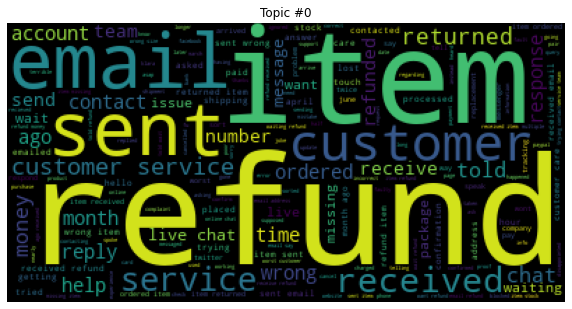

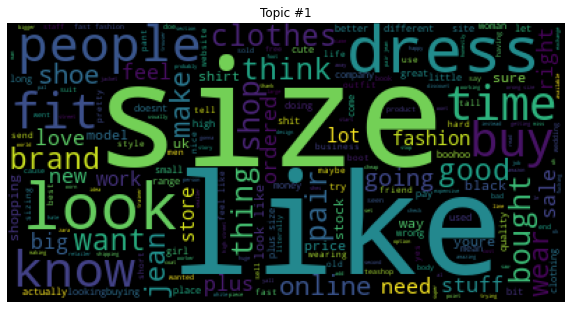

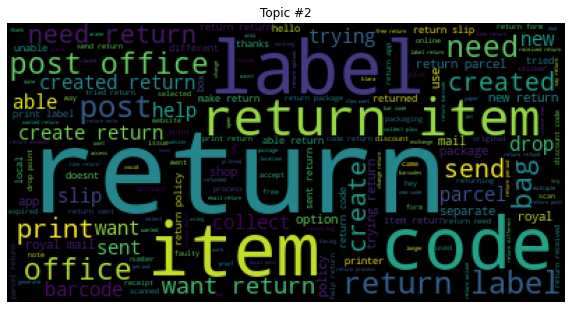

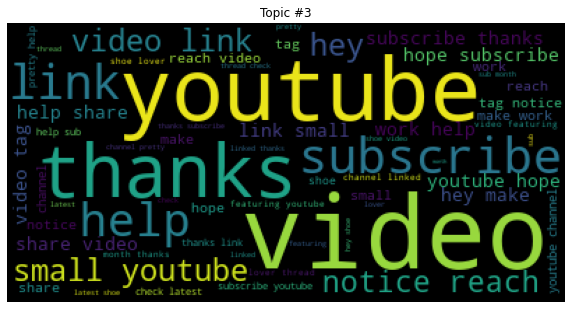

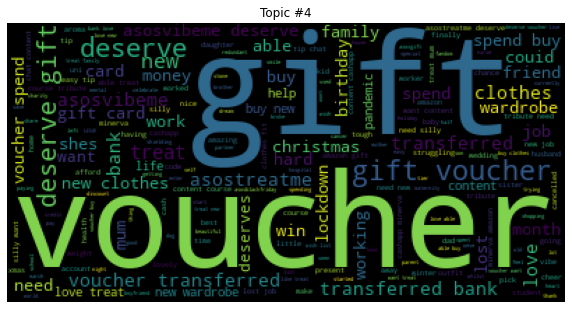

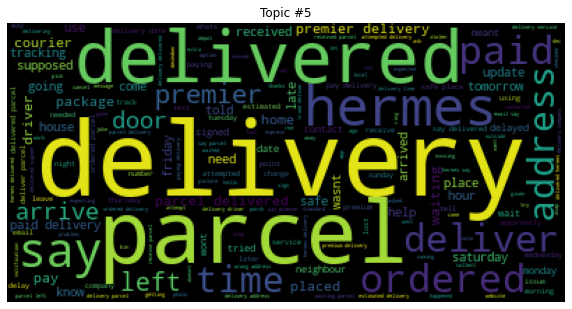

In [73]:
from wordcloud import WordCloud

def get_word_freq(topic, model, n_top_words, vocab):
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

vocab=tfidf_vect.get_feature_names()

for topic in range(6):
    plt.figure(figsize = (10,12))
    plt.imshow(WordCloud().fit_words(dict(get_word_freq(topic, nmf_model_6, 200, vocab))))
    plt.axis('off')
    plt.title('Topic #' + str(topic))
    plt.show();
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

### Sentiment Analysis

In [58]:
flair_sentiment = flair.models.TextClassifier.load('sentiment-fast')

2021-11-09 16:07:10,973 loading file /Users/reefalturki/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


In [59]:
def classify(tweet):
    s = flair.data.Sentence(tweet)
    flair_sentiment.predict(s)
    y=str(s.labels[0]).split()
    label= y[0]
    score = y[1]
    score= float(re.sub('[()]', '', score))
    if score < 0.7:
        label="NEUTRAL"
 
    return label
        

In [60]:
tweets['sentiment']=tweets['cleaned_tweet'].apply(lambda x:classify(x))

In [61]:
tweets.shape

(22504, 6)

In [62]:
tweets_pos=tweets[tweets['sentiment']=='POSITIVE']
tweets_neg=tweets[tweets['sentiment']=='NEGATIVE']
tweets_neu=tweets[tweets['sentiment']=='NEUTRAL']


In [63]:
print('Number of positive tweets is {}'.format(tweets_pos.shape[0]))
print('Number of negative tweets is {}'.format(tweets_neg.shape[0]))
print('Number of neutral tweets is {}'.format(tweets_neu.shape[0]))

print("precentage")
total_rows= tweets.shape[0]
print("Positive: ", round(tweets_pos.shape[0]/total_rows,3)*100,"%")
print("Negative: ",  round(tweets_neg.shape[0]/total_rows,3)*100,"%")
print("Neutral: ",  round(tweets_neu.shape[0]/total_rows,3)*100,"%")

Number of positive tweets is 3663
Number of negative tweets is 16802
Number of neutral tweets is 2039
precentage
Positive:  16.3 %
Negative:  74.7 %
Neutral:  9.1 %


In [64]:
tweets.sample(10)

,date,tweet,place,cleaned_tweet,topic,sentiment
692,2021-09-23,"@eBay_UK @tim @eBayUK_news @eBay @BootsUK @BainInsights @georgjensen @JonathanEley @newlook @LEGO_Group @Halfords_uk @NewLook_Men @sweatybetty @Worldpay_Global @Walmart @ASOS @ASOS_Menswear @ASOS_Us @ASOSMarketplace In terms of adapting to sustainable operations within Retail, @ASOS' Nick Beighton mentioned at #FTRetail that 'it shouldn't be a competition issue, there should be open sources' for companies to work together to tackle climate change and find the most efficient ways together. https://t.co/U4ypTHYNIR",Not specified,in term of adapting to sustainable operation within retail nick brighton mentioned at retail that it shouldnt be competition issue there should be open source for company to work together to tackle climate change and find the most efficient way together,Products,NEUTRAL
7166,2021-01-05,"@WillieS38914473 @B4zzaholica @ASOS_HeretoHelp @Hermesparcels Check hedges, bins, cracks in the wall, under nearby cars anywhere it might fit within a 5 mils radius of your front door 🤦‍♂️ Because of covid they don't wait for you to answer or even bother to knock, they delivered one to us and we found it a week later in a box in the garden",Not specified,zzaholica check hedge bin crack in the wall under nearby car anywhere it might fit within mil radius of your front door because of couid they dont wait for you to answer or even bother to knock they delivered one to and we found it week later in box in the garden,Delivery Service,NEGATIVE
13369,2020-06-30,"@RyanMaue I recall the thread last year, &amp; did mention specific location of the ASOS on the W end of the airport. MIA is long east/west &amp; prevailing E-SE wind most of the year means wind blowing over hot asphalt. Combine that with two major highways close-by in middle of urban area.",Not specified,recall the thread last year did mention specific location of the as on the end of the airport mia is long east west prevailing se wind most of the year mean wind blowing over hot asphalt combine that with two major highway close by in middle of urban area,Products,NEGATIVE
1581,2021-08-06,"@ASOS @sancheznazarian I ordered few items on BFPO address but Hermes returned my parcel to you on 09 June and still I havent received my refund. What a disgusting customer service you have, people get lost to navigate through just to contact you. Still, I havent figured out how to live chat.",Not specified,ordered few item on bro address but hermes returned my parcel to you on june and still havent received my refund what disgusting customer service you have people get lost to navigate through just to contact you still havent figured out how to live chat,Customer Service,NEGATIVE
8310,2020-11-27,"This is also why I don’t buy winter coats from Zara, even if they have a high % of wool in them - one wear and they bobble 🥴 You can get better ‘cheap’ wool winter coats from ASOS and H&amp;M. Just always check the natural fibre % on the label/composition info.",Not specified,this is also why dont buy winter coat from zara even if they have high of wool in them one wear and they bobble you can get better cheap wool winter coat from as and he just always check the natural fibre on the label composition info,Products,NEUTRAL
14811,2020-06-05,"I take the term “treat yourself” to literally. I got paid today and I’ve already ordered from shein, boohoo, and ASOS. I can’t even give my card to anyone because I know my numbers off by heart. I seriously have a problem, my names Tasha and I’m addicted to buying shite online.",Not specified,take the term treat yourself to literally got paid today and ive already ordered from shin boohoo and as cant even give my card to anyone because know my number off by heart seriously have problem my name tasha and im addicted to buying shite online,Products,NEGATIVE
10334,2020-09-23,"‘My mum was a midwife and I always used to look up to her when I was younger. We’re all really maternal in our family an

# EDA

explore data on each topic

### Topic Frequency

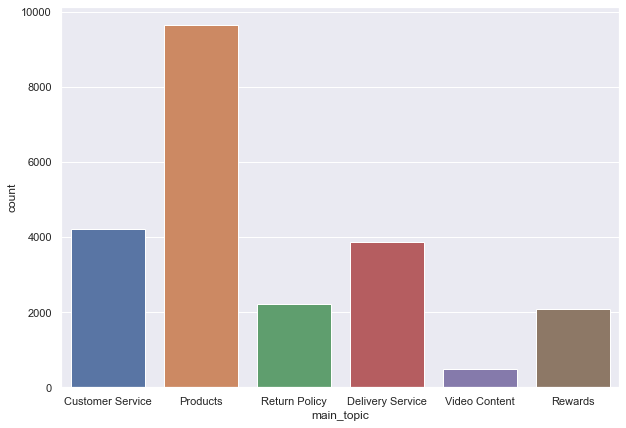

In [153]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="main_topic",data=topics_by_tweet)

In [79]:
count_of_topics=pd.DataFrame(tweets.groupby(['topic','sentiment'], as_index=False)['tweet'].count())
count_of_topics

,topic,sentiment,tweet
0,Customer Service,NEGATIVE,4017
1,Customer Service,NEUTRAL,95
2,Customer Service,POSITIVE,88
3,Delivery Service,NEGATIVE,3504
4,Delivery Service,NEUTRAL,207
5,Delivery Service,POSITIVE,159
6,Products,NEGATIVE,5960
7,Products,NEUTRAL,1287
8,Products,POSITIVE,2400
9,Return Policy,NEGATIVE,2101


<BarContainer object of 6 artists>

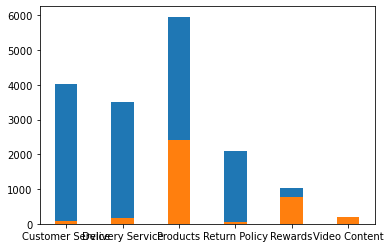

In [90]:
topics=['Customer Service', 'Delivery Service', 'Products','Return Policy', 'Rewards', 'Video Content']
positive=count_of_topics[count_of_topics['sentiment']=='POSITIVE']['tweet']
negative=count_of_topics[count_of_topics['sentiment']=='NEGATIVE']['tweet']
plt.bar(topics,negative,0.4,label='negative')
plt.bar(topics,positive,0.4,label='positive')

In [93]:
negative=[-value for value in negative]
negative

[-4017, -3504, -5960, -2101, -1022, -198]

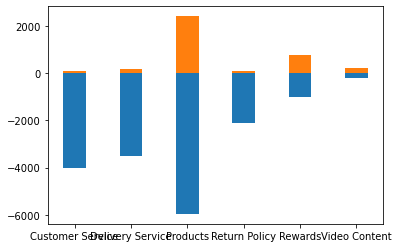

In [94]:
plt.bar(topics,negative,0.4,label='negative')
plt.bar(topics,positive,0.4,label='positive');

### Tweets time series

**Distribution of delivery complaints overime**

In [84]:
negative_delivery_tweets= tweets[tweets['topic']== 'delivery']
negative_delivery_tweets = negative_delivery_tweets[negative_delivery_tweets['sentiment']== 'NEGATIVE']

In [86]:
tweets_neg_time= pd.to_datetime(negative_delivery_tweets['date'], format="%Y-%m-%d")
tweets_neg_time= tweets_neg_time.to_frame()
tweets_neg_time.reset_index(inplace=True, drop=True)

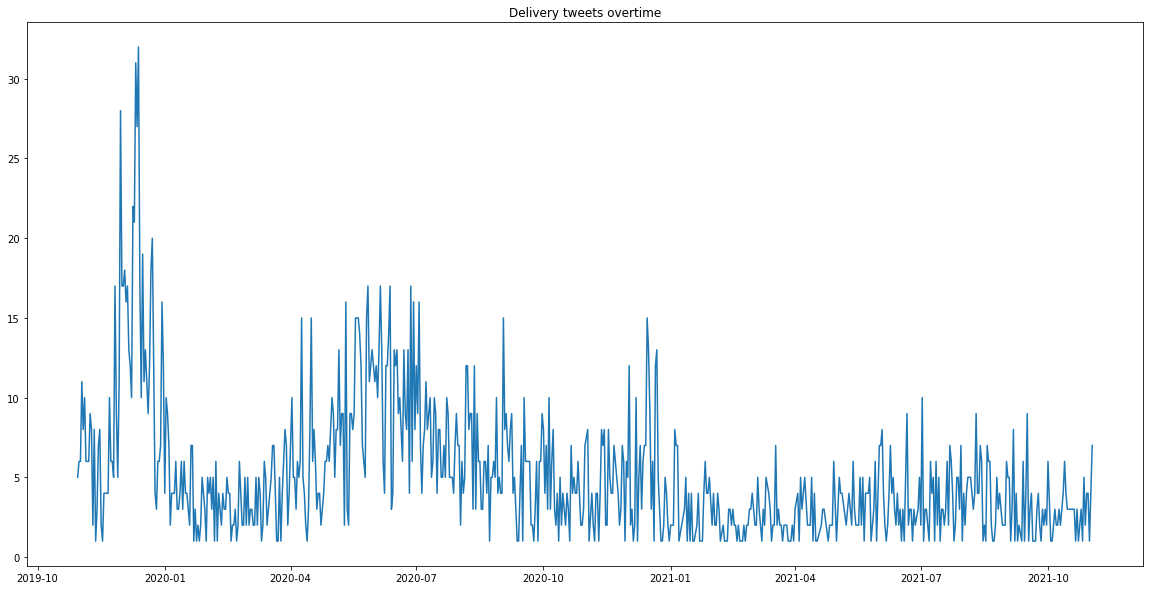

In [87]:
tweets_neg_time= tweets_neg_time.groupby(['date']).size().reset_index(name='counts')
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Delivery tweets overtime")
# make up some data
x = tweets_neg_time['date']
y= tweets_neg_time['counts']
# plot
plt.plot(x,y)
# beautify the x-labels
#plt.gcf().autofmt_xdate()
plt.show()

In [88]:
tweets_neg_time['year']= tweets_neg_time['date'].dt.year
tweets_neg_time['month']= tweets_neg_time['date'].dt.month
tweets_neg_time['day']= tweets_neg_time['date'].dt.day_name()

In [89]:
tweets_neg_time.head()

,date,counts,year,month,day
0,2019-10-30,5,2019,10,Wednesday
1,2019-10-31,6,2019,10,Thursday
2,2019-11-01,6,2019,11,Friday
3,2019-11-02,11,2019,11,Saturday
4,2019-11-03,8,2019,11,Sunday


per month

In [90]:
tweets_per_month= tweets_neg_time.groupby(['month']).size().reset_index(name='counts')
tweets_per_month.sort_values(by='month', inplace=True)
tweets_per_month['month_name'] = tweets_per_month['month'].apply(lambda x: calendar.month_abbr[x])
tweets_per_month.head(12)

,month,counts,month_name
0,1,57,Jan
1,2,54,Feb
2,3,59,Mar
3,4,50,Apr
4,5,55,May
5,6,58,Jun
6,7,61,Jul
7,8,62,Aug
8,9,58,Sep
9,10,62,Oct


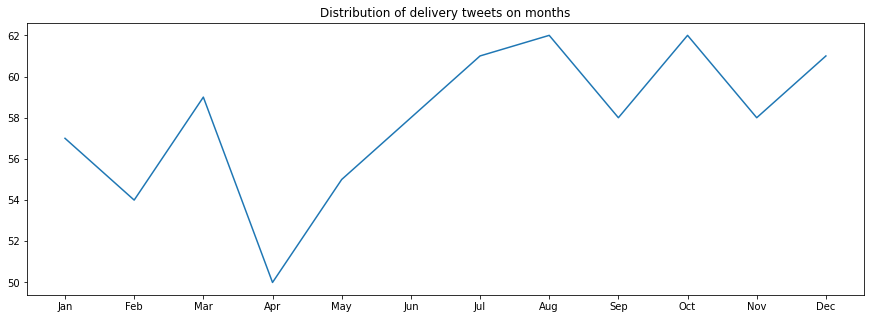

In [91]:

plt.rcParams["figure.figsize"] = (15,5)
# make up some data
plt.title("Distribution of delivery tweets on months")
x = tweets_per_month['month_name']
y = tweets_per_month['counts']

# plot
plt.plot(x,y)
plt.show()

per day

In [92]:
tweets_per_day= tweets_neg_time.groupby(['day']).size().reset_index(name='counts')
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
tweets_per_day['day_num']=tweets_per_day['day'].map(days)
tweets_per_day=tweets_per_day.sort_values(by='day_num')

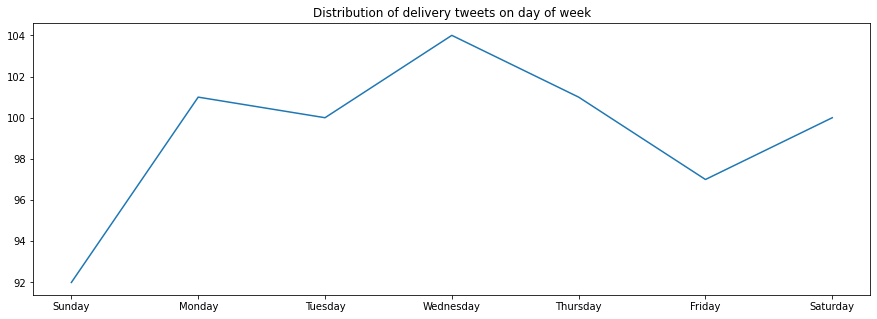

In [93]:
import datetime
import random
import matplotlib.pyplot as plt
plt.title("Distribution of delivery tweets on day of week")
plt.rcParams["figure.figsize"] = (15,5)
x = tweets_per_day['day']
y =  tweets_per_day['counts']

# plot
plt.plot(x,y)
plt.show()

### EDA3

### EDA4